In [71]:
#import dependencies
import matplotlib.pyplot as plt
import hvplot.pandas
import pandas as pd
import requests
from datetime import datetime
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")


In [72]:
# Load the track and field CSV file into a Pandas DataFrame
olympic_track_data = pd.read_csv("results.csv")

olympic_track_data.head()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,25:05.2
1,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,27:05.6
2,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,27:06.3
3,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,27:01.2
4,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,27:02.8


In [73]:
# Load the athlete events CSV file into a Pandas DataFrame
olympic_athletes_data = pd.read_csv("athlete_events.csv")

olympic_athletes_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [74]:
# Load the NOC CSV file into a Pandas DataFrame
NOC_data = pd.read_csv("noc_regions.csv")

NOC_data.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [75]:
distance_df = olympic_track_data.loc[(olympic_track_data['Event']=="10000M Men") | (olympic_track_data['Event']=="10000M Women")|
                                     (olympic_track_data['Event']=="1500M Women")|(olympic_track_data['Event']=="1500M Men") |
                                     (olympic_track_data['Event']=="3000M Women")|(olympic_track_data['Event']=="3000M Men") |
                                     (olympic_track_data['Event']=="4x400M Women")|(olympic_track_data['Event']=="4x400M Men") |
                                     (olympic_track_data['Event']=="5000M Women") | (olympic_track_data['Event']=="5000M Men")|
                                     (olympic_track_data['Event']=="800M Women") | (olympic_track_data['Event']=="800M Men") ]

#long_distance_df = olympic_track_data[(olympic_track_data['Event']=="Marathon Men") |(olympic_track_data['Event']=="Marathon Women")]
 

distance_df.head()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,25:05.2
1,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,27:05.6
2,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,27:06.3
3,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,27:01.2
4,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,27:02.8


# The long distance race walks and marathon results often have fractions of seconds included, but not always.  When they are included, the results seem to not show the hours at the beginning.  This needs to be addressed to have consistent data for these races.

# Split the time strings into hours,minutes, seconds for long distance races

long_distance_df = long_distance_df.dropna(how="any")

long_seconds_result = []
hours = ""
minutes = ""
seconds = ""

for result in long_distance_df['Result']:
    try:
        time = datetime.strptime(result,"%H:%M.%S")
    except ValueError:
        print("There was a time that didn't fit the format")
    except TypeError:
        print("There was a time that didn't fit the format")
        

# Convert the components to integers
    hours = time.hour
    minutes = time.minute
    seconds = time.second
    long_total_seconds = hours * 3600 + minutes * 60 + seconds

    long_seconds_result.append(long_total_seconds)

distance_df['Time(s)']=long_seconds_result

In [76]:
# Split the time strings into minutes, seconds, and hundredths for distance races

distance_df = distance_df.dropna(how="any")

seconds_result = []
minutes = ""
seconds = ""

for result in distance_df['Result']:
    try:
        time = datetime.strptime(result,"%M:%S.%f")
    except ValueError:
        print("There was a time that didn't fit the format")
    except TypeError:
        print("There was a time that didn't fit the format")
        

# Convert the components to integers
    minutes = time.minute
    seconds = time.second
    hundredths = time.microsecond
    total_seconds = minutes * 60 + seconds
    total_time = float(total_seconds) + hundredths/1000000

    seconds_result.append(total_time)

distance_df['Time']=seconds_result

distance_df.tail()


,Gender,Event,Location,Year,Medal,Name,Nationality,Result,Time
2064,W,800M Women,Munich,1972,B,Gunhild HOFFMEISTER,GDR,01:59.2,119.2
2065,W,800M Women,Tokyo,1964,G,Ann PACKER,GBR,02:01.1,121.1
2066,W,800M Women,Tokyo,1964,S,Maryvonne DUPUREUR,FRA,02:01.9,121.9
2067,W,800M Women,Tokyo,1964,B,Ann Marise CHAMBERLAIN,NZL,02:02.8,122.8
2068,W,800M Women,Amsterdam,1928,G,"Karoline ""Lina"" RADKE",GER,02:16.8,136.8


Distance Races

In [77]:
ten_thousand_m_df = distance_df.loc[(distance_df['Event']=='10000M Men')]
ten_thousand_w_df = distance_df.loc[(distance_df['Event']=='10000M Women')]
eight_hundred_m_df = distance_df.loc[(distance_df['Event']=='800M Men')]
eight_hundred_w_df = distance_df.loc[(distance_df['Event']=='800M Women')]
fifteen_hundred_w_df = distance_df.loc[(distance_df['Event']=='1500M Women')]
fifteen_hundred_m_df = distance_df.loc[(distance_df['Event']=='1500M Men')]
five_thousand_w_df = distance_df.loc[(distance_df['Event']=='5000M Women')]
five_thousand_m_df = distance_df.loc[(distance_df['Event']=='5000M Men')]


five_thousand_w_df.head()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result,Time
2008,W,5000M Women,Rio,2016,G,Vivian Jepkemoi CHERUIYOT,KEN,14:26.2,866.2
2009,W,5000M Women,Rio,2016,S,Hellen Onsando OBIRI,KEN,14:29.8,869.8
2010,W,5000M Women,Rio,2016,B,Almaz AYANA,ETH,14:33.6,873.6
2011,W,5000M Women,Beijing,2008,G,Tirunesh DIBABA,ETH,15:41.4,941.4
2012,W,5000M Women,Beijing,2008,S,Elvan ABEYLEGESSE,TUR,15:42.7,942.7


In [ ]:
# ten thousand men create scatter plot
ten_thousand_m_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 10,000 meter Men",xlabel = "Year of Olympics", ylabel = "Time (seconds)")

#save the plot
plt.savefig("output_files/10000men.png")

# Show the plot
plt.show()
# boxplot
#ten_thousand_m_df.boxplot("Time", by="Year", figsize=(20, 10))


In [ ]:
# ten thousand m women create scatter plot
ten_thousand_w_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 10,000 meter Women",xlabel = "Year of Olympics", ylabel = "Time (seconds)")
#save the plot
plt.savefig("output_files/10000women.png")

# Show the plot
plt.show()


# boxplot
#ten_thousand_w_df.boxplot("Time", by="Year", figsize=(20, 10))

In [ ]:
# five thousand men create scatter plot
five_thousand_m_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 5,000 meter Men",xlabel = "Year of Olympics", ylabel = "Time (seconds)")

#save the plot
plt.savefig("output_files/5000men.png")

# Show the plot
plt.show()
# boxplot
#five_thousand_m_df.boxplot("Time", by="Year", figsize=(20, 10))

In [ ]:
# five thousand women create scatter plot
five_thousand_w_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 5,000 meter Women",xlabel = "Year of Olympics", ylabel = "Time (seconds)",xticks=five_thousand_w_df['Year'])

#save the plot
plt.savefig("output_files/5000women.png")

# Show the plot
plt.show()
# boxplot
#five_thousand_w_df.boxplot("Time", by="Year", figsize=(20, 10))

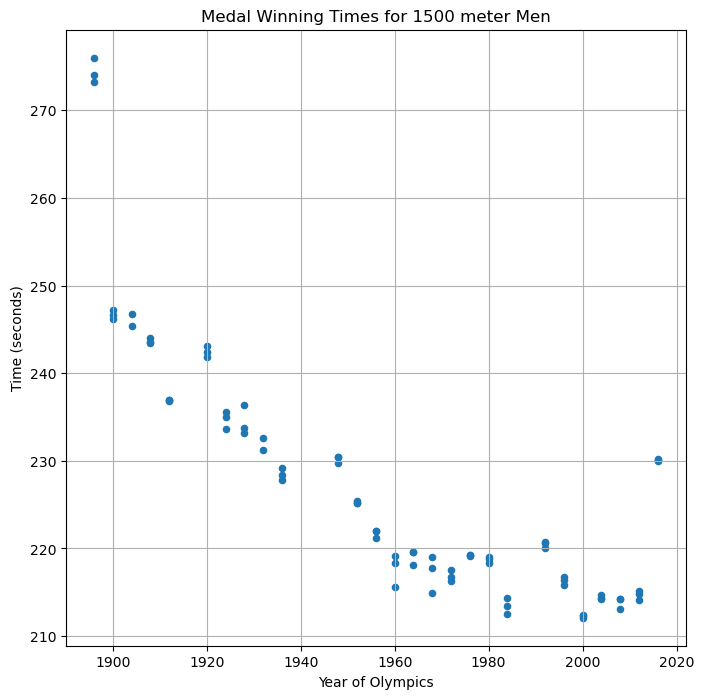

In [114]:
# fifteen hundred men create scatter plot
fifteen_hundred_m_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 1500 meter Men",xlabel = "Year of Olympics", ylabel = "Time (seconds)")

#save the plot
plt.savefig("output_files/1500men.png")

# Show the plot
plt.show()
# boxplot
#fifteen_hundred_m_df.boxplot("Time", by="Year", figsize=(20, 10))

In [ ]:
# fifteen hundred women create scatter plot
fifteen_hundred_w_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 1500 meter Women",xlabel = "Year of Olympics", ylabel = "Time (seconds)")

#save the plot
plt.savefig("output_files/1500women.png")

# Show the plot
plt.show()
# boxplot
#fifteen_hundred_w_df.boxplot("Time", by="Year", figsize=(20, 10))

800 m Men

In [ ]:
# eight hundred men create scatter plot
eight_hundred_m_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 800 meter Men",xlabel = "Year of Olympics", ylabel = "Time (seconds)")

#save the plot
plt.savefig("output_files/800men.png")

# Show the plot
plt.show()
# boxplot
#eight_hundred_m_df.boxplot("Time", by="Year", figsize=(20, 10))

800 m Women

In [ ]:
# eight hundred women create scatter plot
eight_hundred_w_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 800 meter Women",xlabel = "Year of Olympics", ylabel = "Time (seconds)")

#save the plot
plt.savefig("output_files/800women.png")

# Show the plot
plt.show()
# boxplot
#eight_hundred_w_df.boxplot("Time", by="Year", figsize=(20, 10))

JUMPS
Filter the Jumps data into a dataframe and clean the results - changing results into float values for height

In [105]:
jumps_df = olympic_track_data.loc[(olympic_track_data['Event']=="High Jump Men") | (olympic_track_data['Event']=="High Jump Women")|
                                     (olympic_track_data['Event']=="Pole Vault Women")|(olympic_track_data['Event']=="Pole Vault Men") |
                                     (olympic_track_data['Event']=="Long Jump Women")|(olympic_track_data['Event']=="Long Jump Men") |
                                     (olympic_track_data['Event']=="Triple Jump Women")|(olympic_track_data['Event']=="Triple Jump Men")
                                    ]

#long_distance_df = olympic_track_data[(olympic_track_data['Event']=="Marathon Men") |(olympic_track_data['Event']=="Marathon Women")]
 
height = []
for result in jumps_df['Result']:
    high = float(result)
    height.append(high)

jumps_df['height']=height
jumps_df.head()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result,height
1200,M,High Jump Men,Rio,2016,G,Derek DROUIN,CAN,2.38,2.38
1201,M,High Jump Men,Rio,2016,S,Mutaz Essa BARSHIM,QAT,2.36,2.36
1202,M,High Jump Men,Rio,2016,B,Bohdan BONDARENKO,UKR,2.33,2.33
1203,M,High Jump Men,Beijing,2008,G,Andrey SILNOV,RUS,2.36,2.36
1204,M,High Jump Men,Beijing,2008,S,Germaine MASON,GBR,2.34,2.34


setting up Jump dataframes for plotting

In [111]:
high_jump_m_df = jumps_df.loc[(jumps_df['Event']=='High Jump Men')]
high_jump_w_df = jumps_df.loc[(jumps_df['Event']=='High Jump Women')]
long_jump_m_df = jumps_df.loc[(jumps_df['Event']=='Long Jump Men')]
long_jump_w_df = jumps_df.loc[(jumps_df['Event']=='Long Jump Women')]
triple_jump_m_df = jumps_df.loc[(jumps_df['Event']=='Triple Jump Men')]
triple_jump_w_df = jumps_df.loc[(jumps_df['Event']=='Triple Jump Women')]
pole_vault_m_df = jumps_df.loc[(jumps_df['Event']=='Pole Vault Men')]
pole_vault_w_df = jumps_df.loc[(jumps_df['Event']=='Pole Vault Women')]

High Jump Men = plot

In [ ]:
# high jump men create scatter plot
high_jump_m_df.plot(kind="scatter", x="Year", y="height", grid=True, figsize=(8,8),
              title="Medal Winning High Jumps Men",xlabel = "Year of Olympics", ylabel = "Height(m)")

#save the plot
plt.savefig("output_files/high_jump_men.png")

# Show the plot
plt.show()
# boxplot
#high_jump_m_df.boxplot("height", by="Year", figsize=(20, 10))

In [ ]:
# high jump women create scatter plot
high_jump_w_df.plot(kind="scatter", x="Year", y="height", grid=True, figsize=(8,8),
              title="Medal Winning High Jumps Women",xlabel = "Year of Olympics", ylabel = "Height(m)")

#save the plot
plt.savefig("output_files/high_jump_women.png")

# Show the plot
plt.show()

In [ ]:
# long jump men create scatter plot
long_jump_m_df.plot(kind="scatter", x="Year", y="height", grid=True, figsize=(8,8),
              title="Medal Winning Long Jumps Men",xlabel = "Year of Olympics", ylabel = "Distance(m)")

#save the plot
plt.savefig("output_files/long_jump_men.png")

# Show the plot
plt.show()

In [ ]:
# long jump women create scatter plot
long_jump_w_df.plot(kind="scatter", x="Year", y="height", grid=True, figsize=(8,8),
              title="Medal Winning Long Jumps Women",xlabel = "Year of Olympics", ylabel = "Distance(m)")

#save the plot
plt.savefig("output_files/long_jump_women.png")

# Show the plot
plt.show()

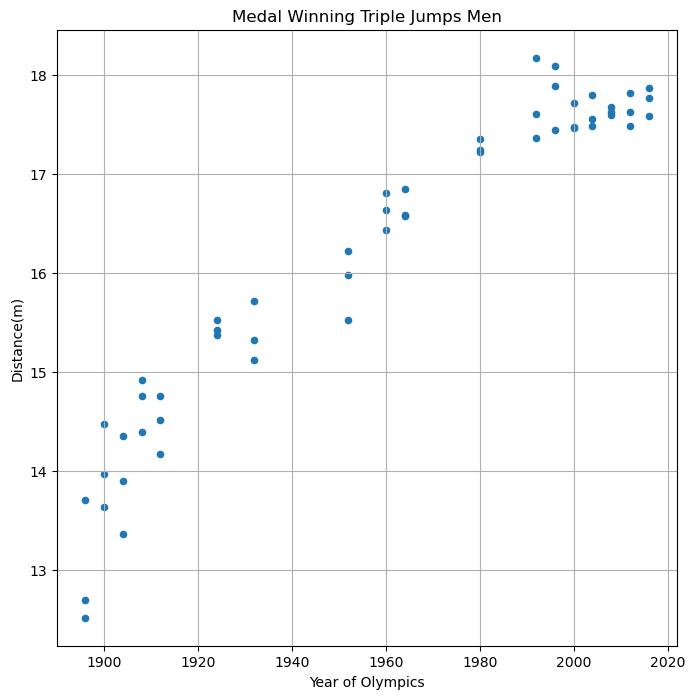

In [119]:
# triple jump men create scatter plot
triple_jump_m_df.plot(kind="scatter", x="Year", y="height", grid=True, figsize=(8,8),
              title="Medal Winning Triple Jumps Men",xlabel = "Year of Olympics", ylabel = "Distance(m)")

#save the plot
plt.savefig("output_files/triple_jump_men.png")

# Show the plot
plt.show()

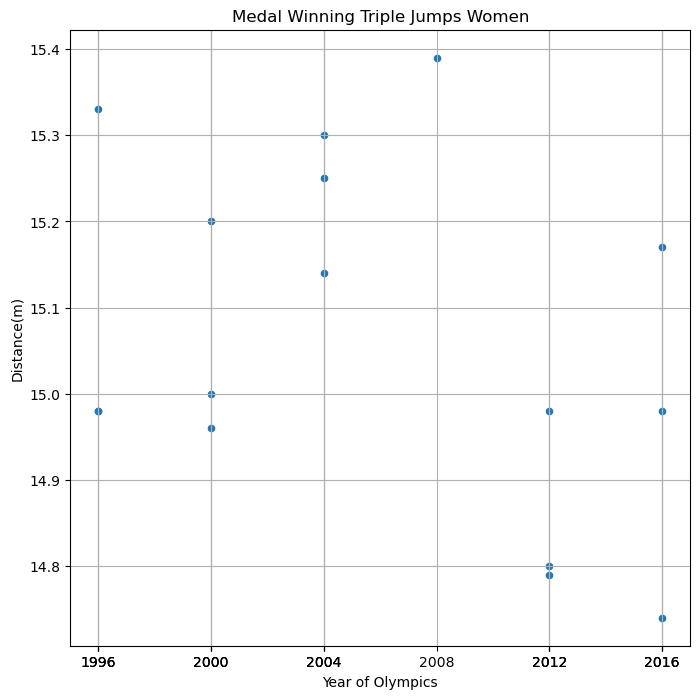

In [121]:
# triple jump women create scatter plot
triple_jump_w_df.plot(kind="scatter", x="Year", y="height", grid=True, figsize=(8,8),
              title="Medal Winning Triple Jumps Women",xlabel = "Year of Olympics", ylabel = "Distance(m)",xticks=triple_jump_w_df['Year'])

#save the plot
plt.savefig("output_files/triple_jump_women.png")

# Show the plot
plt.show()

In [ ]:
# pole vault men create scatter plot
pole_vault_m_df.plot(kind="scatter", x="Year", y="height", grid=True, figsize=(8,8),
              title="Medal Winning Pole Vaults Men",xlabel = "Year of Olympics", ylabel = "Height (m)")

#save the plot
plt.savefig("output_files/pole_vault_men.png")

# Show the plot
plt.show()

In [ ]:
# pole vault women create scatter plot
pole_vault_w_df.plot(kind="scatter", x="Year", y="height", grid=True, figsize=(8,8),
              title="Medal Winning Pole Vaults Women",xlabel = "Year of Olympics", ylabel = "Height (m)")

#save the plot
plt.savefig("output_files/pole_vault_women.png")

# Show the plot
plt.show()

In [ ]:
#extract groups by year 10000 m Men
group0 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1912]["Time"]
group1 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1920]["Time"]
group2 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1924]["Time"]
group3 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1928]["Time"]
group4 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1932]["Time"]
group5= ten_thousand_m_df[ten_thousand_m_df["Year"] == 1936]["Time"]
group6= ten_thousand_m_df[ten_thousand_m_df["Year"] == 1948]["Time"]
group7 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1952]["Time"]
group8 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1956]["Time"]
group9 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1960]["Time"]
group10 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1984]["Time"]
group11 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1988]["Time"]
group12 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1992]["Time"]
group13 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1996]["Time"]
group14 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 2000]["Time"]
group15= ten_thousand_m_df[ten_thousand_m_df["Year"] == 2004]["Time"]
group16 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 2008]["Time"]
group17 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 2012]["Time"]
group18 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 2016]["Time"]

population = []
count = 0
while count <68:
    population.append((ten_thousand_m_df['Time'][count]))
    count+=1

# population

In [49]:
# ANOVA testing 10000 m Men

stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9, 
               group10, group11)

F_onewayResult(statistic=nan, pvalue=nan)

In [50]:
#extract groups by year 10000 m Women
group0 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1992]["Time"]
group1 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1996]["Time"]
group2 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 2000]["Time"]
group3 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 2004]["Time"]
group4 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 2008]["Time"]
group5= ten_thousand_m_df[ten_thousand_m_df["Year"] == 2012]["Time"]
group6 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 2016]["Time"]

In [51]:
# ANOVA testing 10000 m Women

stats.f_oneway(group0, group1, group2, group3, group4, group5, group6)

F_onewayResult(statistic=2.8674495532651543, pvalue=0.04892405607657807)

# one t-test   not working

#get the mean
stats.ttest_1samp(group18, population.mean())

In [ ]:
# Build scatter plot for Time result vs. Year of Olympics
distance_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for Mens 10,000 meter",xlabel = "Year of Olympics", ylabel = "Time (seconds)")

Dist_events = ['10000 M Men', '10000M Women','1500M Women','1500M Men','3000M Women','3000M Men',"4x400M Women","4x400M Men",
               '5000M Women','5000M Men','800M Women','800M Men']

count = 0
for event in Dist_events:
    
    event_count_df = distance_df.loc[distance_df[event]]
    
    event_count_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title=(f'Medal Winning Times for ', event ),xlabel = "Year of Olympics", ylabel = "Time (seconds)")
    count += 1




# Incorporate the other graph properties
# YOUR CODE HERE
